<a href="https://colab.research.google.com/github/Bishawa/RetailSalesPrediction/blob/main/Retail_Sales_Prediction_ML_regression_project_Bishawajeet_Singha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
from pandas import datetime as dt
import datetime
import missingno as msno


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

# Importing Essential Libraries
import pandas as pd
import numpy as np
from pandas import datetime as dt
from pandas import Series,DataFrame
from datetime import datetime

# Importing Libraries For Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
from scipy import stats



# Importing Libraries For ML Model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,accuracy_score
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

# Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

<ipython-input-2-e041b9353be2>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime as dt
<ipython-input-2-e041b9353be2>:21: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime as dt


In [29]:
pd.set_option('display.max_columns', None)

In [3]:
sales_data = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Module 4 ML /Regression ML capstone project /Rossmann Stores Data.csv')
store_data = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Module 4 ML /Regression ML capstone project /store.csv')

In [4]:
sales_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
store_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### Dataset Information

* Id - is the Id that represents a (Store, Date) value.
*Date (Date) - Date of each entry
* DayOfWeek - which day of the week sales we're calculating.
* Store - unique Id of each store.
* Sales- the turnover for any given day(Predictor)
* Customers - the number of customers on a given day.
* Open - an indicator for whether the store was open: 0 = closed, 1 = open
* Open -  representing whether the store was open: 0 = closed, 1 = open
* StateHoliday - represents a state holiday. Usually all stores, except few, are closed on state holidays. All schools are closed on public holidays and weekends. a = Public holiday, b = Easter holiday, c = Christmas, 0 = None
* SchoolHoliday - represents if the (Store,Date) was affected by the closure of public schools
* StoreType - differentiates between 4 different store models: a, b, c, d
* Assortment - describes the assortment level: a = basic, b = extra, c = extended
* CompetitionDistance - distance in meters to the nearest competitor store
* CompetitionOpenSinceMonth/Year - gives the approximate year and month of the time the nearest competitor was opened
* Promo(nominal) - indicates whether a store is running a promo on that day
* Promo2(nominal) - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store


In [16]:
df = sales_data.merge(store_data,how='inner',left_on='Store',right_on='Store', validate="many_to_one")

In [27]:
df.head(20)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31
1,1,4,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,30
2,1,3,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,29
3,1,2,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,28
4,1,1,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,27
5,1,7,0,0,0,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,26
6,1,6,4364,500,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,25
7,1,5,3706,459,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,24
8,1,4,3769,503,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,23
9,1,3,3464,463,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,22


In [18]:
df.shape

(1017209, 18)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [12]:
df.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

In [21]:
# shape of the dataframe
Row, Column = df.shape
print(f"Number of rows is {Row}")
print(f"Number of columns is {Column}")

Number of rows is 1017209
Number of columns is 21


In [14]:
print('number of rows is {}'.format(df.shape[0]))
print('number of columns is {}'.format(df.shape[1]))

number of rows is 1017209
number of columns is 18


In [15]:
df.columns 

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [19]:
df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


In [20]:
# Converting the date column into date-time format and then extracting the date and time 
## Converting the Date Column Data Type To DateTime 
df["Date"]=pd.to_datetime(df["Date"])
df["Year"]=df["Date"].dt.year
df["Month"]=df["Date"].dt.month
df["Day"]=df["Date"].dt.day

In [22]:
# To reduce the numebr of columns now we can drop the date column 
df = df.drop(['Date'], axis = 1)

In [30]:
df.head(20)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31
1,1,4,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,30
2,1,3,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,29
3,1,2,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,28
4,1,1,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,27
5,1,7,0,0,0,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,26
6,1,6,4364,500,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,25
7,1,5,3706,459,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,24
8,1,4,3769,503,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,23
9,1,3,3464,463,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,22


In [113]:
df.sample(30)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
685847,754,2,8780,987,1,1,0,0,c,c,380.0,5.0,2008.0,1,10.0,2014.0,"Mar,Jun,Sept,Dec",2015,5,19
260711,288,1,8375,550,1,1,0,0,d,a,800.0,NaN,NaN,1,14.0,2011.0,"Mar,Jun,Sept,Dec",2015,4,13
15822,17,2,9034,1087,1,1,0,0,a,a,50.0,12.0,2005.0,1,26.0,2010.0,"Jan,Apr,Jul,Oct",2013,1,8
1005662,1103,5,6141,469,1,1,0,0,d,c,1340.0,10.0,2006.0,1,5.0,2013.0,"Feb,May,Aug,Nov",2015,3,6
807428,886,1,8668,751,1,1,0,0,a,c,12430.0,10.0,2004.0,0,NaN,NaN,NaN,2014,5,19
724507,795,5,3463,434,1,0,0,1,d,a,510.0,NaN,NaN,1,35.0,2010.0,"Mar,Jun,Sept,Dec",2013,4,5
408001,448,5,10489,875,1,1,0,0,a,c,3970.0,9.0,2009.0,0,NaN,NaN,NaN,2015,2,6
227341,251,3,24583,2757,1,1,0,1,a,c,340.0,NaN,NaN,0,NaN,NaN,NaN,2015,4,1
795844,873,1,3659,434,1,1,0,1,a,a,2040.0,11.0,2008.0,0,NaN,NaN,NaN,2013,7,29
577861,634,3,7144,660,1,1,0,1,d,a,18610.0,NaN,NaN,0,NaN,NaN,NaN,2014,2,19


In [23]:
df['Promo2SinceYear'].value_counts()

2011.0    115056
2013.0    110464
2014.0     79922
2012.0     73174
2009.0     65270
2010.0     56240
2015.0      9052
Name: Promo2SinceYear, dtype: int64

In [25]:
df["Promo2SinceWeek"].value_counts().sort_index()

1.0     32418
5.0     35818
6.0       942
9.0     12452
10.0    38828
13.0    29820
14.0    72990
18.0    27318
22.0    28694
23.0     4342
26.0      942
27.0     9626
28.0      942
31.0    39976
35.0    22814
36.0     9236
37.0    32786
39.0     4732
40.0    62598
44.0     2642
45.0    29268
48.0     8294
49.0      758
50.0      942
Name: Promo2SinceWeek, dtype: int64

In [75]:
df['Promo2SinceWeek'].isnull().sum()

508031

In [26]:
df["Sales"].value_counts()

0        172871
5674        215
5558        197
5483        196
6214        195
          ...  
19268         1
18344         1
17685         1
19544         1
21237         1
Name: Sales, Length: 21734, dtype: int64

In [32]:
df["Customers"].value_counts()

0       172869
560       2414
576       2363
603       2337
571       2330
         ...  
4587         1
4115         1
4931         1
4440         1
4106         1
Name: Customers, Length: 4086, dtype: int64

In [69]:
year_wise_customer

,Year,Customers
0,2013,406974
1,2014,373855
2,2015,236380


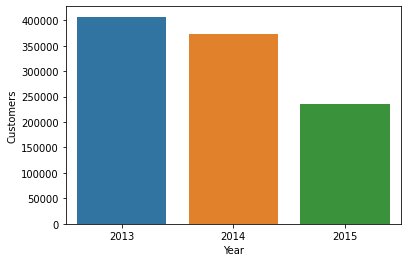

In [73]:
sns.barplot(x=year_wise_customer['Year'], y=year_wise_customer['Customers'])

In [63]:
year_wise_customer = pd.DataFrame(df.groupby(['Year'])['Customers'].size())


In [68]:
year_wise_customer.reset_index(inplace=True)

In [83]:
year_month_wise_customer = df.groupby(['Year', 'Month']).size()

In [87]:
year_month_wise_customer = year_month_wise_customer.reset_index()

In [89]:
year_month_wise_customer.rename(columns={0 : 'Customers'})

,Year,Month,Customers
0,2013,1,34564
1,2013,2,31220
2,2013,3,34565
3,2013,4,33450
4,2013,5,34565
5,2013,6,33450
6,2013,7,34565
7,2013,8,34565
8,2013,9,33450
9,2013,10,34565


In [76]:
df["Open"].value_counts()

1    844392
0    172817
Name: Open, dtype: int64

In [82]:
df.groupby(['Open'])['Customers'].count()

Open
0    172817
1    844392
Name: Customers, dtype: int64

In [101]:
df["StateHoliday"].value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [102]:
df.StateHoliday.unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [104]:
df['StateHoliday'].replace(0, '0', inplace = True)

In [105]:
df.StateHoliday.unique()

array(['0', 'a', 'b', 'c'], dtype=object)

In [106]:
df["StateHoliday"].value_counts()

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [108]:
df.groupby(['StateHoliday'])['Sales'].mean()

StateHoliday
0    5947.483893
a     290.735686
b     214.311510
c     168.733171
Name: Sales, dtype: float64

In [107]:
df["SchoolHoliday"].value_counts()

0    835488
1    181721
Name: SchoolHoliday, dtype: int64

In [109]:
df.groupby(['SchoolHoliday'])['Sales'].mean()

SchoolHoliday
0    5620.979034
1    6476.522207
Name: Sales, dtype: float64

In [110]:
df["StoreType"].value_counts()

a    551627
d    312912
c    136840
b     15830
Name: StoreType, dtype: int64

In [111]:
df.groupby(['StoreType'])['Sales'].mean()

StoreType
a     5738.179710
b    10058.837334
c     5723.629246
d     5641.819243
Name: Sales, dtype: float64

In [115]:
df["CompetitionOpenSinceMonth"].value_counts().sort_index()

1.0      12452
2.0      37886
3.0      63548
4.0      87076
5.0      39608
6.0      45444
7.0      59434
8.0      36186
9.0     114254
10.0     55622
11.0     84455
12.0     57896
Name: CompetitionOpenSinceMonth, dtype: int64

In [114]:
df["CompetitionOpenSinceYear"].value_counts()

2013.0    75426
2012.0    74299
2014.0    63732
2005.0    56564
2010.0    51258
2009.0    49396
2011.0    49396
2008.0    48476
2007.0    43744
2006.0    42802
2015.0    35060
2002.0    24882
2004.0    19804
2003.0    16794
2001.0    14704
2000.0     9236
1999.0     7352
1990.0     4710
1994.0     1884
1995.0     1700
1961.0      942
1998.0      942
1900.0      758
Name: CompetitionOpenSinceYear, dtype: int64